In [122]:
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm 
from tqdm import tqdm 
from datetime import  datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [123]:
#df = pd.read_csv (path / 'Bin16mod.csv')

# Original file name
#filename = path / 'PHERC_data_2023.xls'
#df = pd.read_excel(filename, sheet_name = '_B13')
#--------------------------------------------------------------
d = pd.ExcelFile ("W:\\Amber Ag\ASABE 2022\OPI_raw\Data bank\PHERC_data_21Aug23.xls")
#df = pd.read_excel(filename)

df = pd.read_excel(d, sheet_name = '_B16')
df
#xls = pd.ExcelFile ('W:/Amber Ag/Amber clean data/Bin 13 review/Measured_CO2_bin13.xlsx')
#mf = pd.read_excel(xls, sheet_name = 'Sheet1')
#mf
path= "W:\\Amber Ag\ASABE 2022\OPI_raw\Data bank"

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_612\3758334524.py:7: SyntaxWarning: invalid escape sequence '\A'
  d = pd.ExcelFile ("W:\\Amber Ag\ASABE 2022\OPI_raw\Data bank\PHERC_data_21Aug23.xls")
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_612\3758334524.py:15: SyntaxWarning: invalid escape sequence '\A'
  path= "W:\\Amber Ag\ASABE 2022\OPI_raw\Data bank"


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [124]:
# Load file into Pandas data frame
#df = pd.read_excel(filename)
#df


In [125]:
def clean_time(x):
    # Remove unnecesary charactor
    timestamp_text = x[:16]
    # Convert to Python datetime variable
    timestamp = datetime.strptime(timestamp_text, '%Y-%m-%d %H:%M')
    return timestamp

In [126]:
df['OPI_DATE'] = df['OPI_DATE'].apply(lambda x: clean_time(x))

In [127]:
df['C1'] = df['C1'].apply(lambda x: x.split('\t'))
df['C2'] = df['C2'].apply(lambda x: x.split('\t'))
df['C3'] = df['C3'].apply(lambda x: x.split('\t'))
df['C4'] = df['C4'].apply(lambda x: x.split('\t'))
df['C5'] = df['C5'].apply(lambda x: x.split('\t'))

In [128]:
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:24:00,73.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,64.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,69.98\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,73.500000,64.400002,9.1,69.980003,9.10,...,35.60\t37.10\t38.40\t39.50\t40.50\t41.90\t43.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00,62.60\t61.90\t61.60\t-99.90\t62.90\r\n,58.30\t58.40\t58.00\t-99.90\t58.60\r\n,61.04\t60.26\t59.81\t-99.90\t60.75\r\n,NaN,62.900002,58.000000,4.9,60.480000,4.90,...,47.80\t49.20\t49.80\t50.80\t51.40\t52.60\t54.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00,55.30\t54.30\t54.40\t-99.90\t54.50\r\n,53.20\t53.20\t52.80\t-99.90\t53.00\r\n,54.47\t53.70\t53.54\t-99.90\t53.86\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.299999,52.799999,2.5,53.910000,2.50,...,61.20\t62.00\t62.50\t63.50\t64.70\t65.30\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:00,55.00\t53.80\t54.10\t-99.90\t54.20\r\n,52.90\t53.00\t52.60\t-99.90\t52.80\r\n,54.12\t53.41\t53.24\t-99.90\t53.56\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,55.000000,52.599998,2.4,53.599998,2.40,...,62.30\t63.10\t63.40\t64.60\t65.30\t65.60\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:26:00,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.50\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.10\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.500000,1.3,45.099998,1.30,...,87.90\t87.90\t87.90\t88.30\t88.50\t88.30\t88.9...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,2023-08-21 10:58:00,96.90\t95.60\t91.10\t-99.90\t99.50\r\n,61.60\t61.00\t67.00\t-99.90\t63.10\r\n,77.62\t72.49\t76.77\t-99.90\t75.03\r\n,NaN,99.500000,61.000000,38.5,75.540001,15.27,...,37.50\t38.50\t39.40\t42.40\t64.20\t66.

In [515]:
# #USE THIS CODE FOR SENSOR 456 AVERAGE for x in xs[3:6]:

# def average_first456(xs):
#     total = 0
#     count = 0
#     for x in xs[6:9]:
#         if x != 'NaN' and float(x) > -32:
#             total += float(x)
#             count += 1
#     if count > 0:
#         return  total / count
#     else:
#         return np.nan

In [129]:
def average_first5(xs):
    total = 0
    count = 0
#     for x in xs[:3]:     for first 3 sensors
    for x in xs[:5]:
        if x != 'NaN' and float(x) > -32:
            total += float(x)
            count += 1
    if count > 0:
        return  total / count
    else:
        return np.nan

In [130]:
clean_df = df[['OPI_DATE']].copy()
clean_df

,OPI_DATE
0,2020-10-28 15:24:00
1,2020-10-28 16:08:00
2,2020-10-28 17:08:00
3,2020-10-28 17:11:00
4,2020-10-28 19:26:00
...,...
22066,2023-08-21 10:58:00
22067,2023-08-21 11:58:00
22068,2023-08-21 12:58:00
22069,2023-08-21 13:58:00


In [131]:
clean_df['C1s-avg'] = df['C1'].apply(lambda x: average_first5(x)) 
clean_df['C2s-avg'] = df['C2'].apply(lambda x: average_first5(x)) 
clean_df['C3s-avg'] = df['C3'].apply(lambda x: average_first5(x)) 
clean_df['C4s-avg'] = df['C4'].apply(lambda x: average_first5(x)) 
clean_df['C5s-avg'] = df['C5'].apply(lambda x: average_first5(x)) 

In [132]:
df['RH1'] = df['RH1'].apply(lambda x: x.split('\t'))
# df['RH2'] = df['RH2'].apply(lambda x: x.split('\t'))
# df['RH3'] = df['RH3'].apply(lambda x: x.split('\t'))
# df['RH4'] = df['RH4'].apply(lambda x: x.split('\t'))
# df['RH5'] = df['RH5'].apply(lambda x: x.split('\t'))

In [133]:
clean_df['RH1s-avg'] = df['RH1'].apply(lambda x: average_first5(x)) 
# clean_df['RH2s-avg'] = df['RH2'].apply(lambda x: average_first5(x)) 
# clean_df['RH3s-avg'] = df['RH3'].apply(lambda x: average_first5(x)) 
# clean_df['RH4s-avg'] = df['RH4'].apply(lambda x: average_first5(x)) 
# clean_df['RH5s-avg'] = df['RH5'].apply(lambda x: average_first5(x)) 

In [134]:
df['MC1'] = df['MC1'].apply(lambda x: x.split('\t'))
#df['MC2'] = df['MC2'].apply(lambda x: x.split('\t'))
#df['MC3'] = df['MC3'].apply(lambda x: x.split('\t'))
#df['MC4'] = df['MC4'].apply(lambda x: x.split('\t'))
#df['MC5'] = df['MC5'].apply(lambda x: x.split('\t'))

In [135]:
clean_df['MC1s-avg'] = df['MC1'].apply(lambda x: average_first5(x)) 
#clean_df['MC2s-avg'] = df['MC2'].apply(lambda x: average_first5(x)) 
# clean_df['MC3s-avg'] = df['MC3'].apply(lambda x: average_first5(x)) 
# clean_df['MC4s-avg'] = df['MC4'].apply(lambda x: average_first5(x)) 
# clean_df['MC5s-avg'] = df['MC5'].apply(lambda x: average_first5(x)) 

In [136]:
clean_df_excel = clean_df.copy()
clean_df_excel['OPI_DATE'] = clean_df_excel['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
#save to excel
a=path+'\\PHERC_data_b16.xlsx'
clean_df_excel.to_excel(a, index=False)
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,MC1s-avg
0,2020-10-28 15:24:00,72.26,NaN,NaN,NaN,NaN,38.22,NaN
1,2020-10-28 16:08:00,62.16,61.02,60.64,NaN,61.64,49.80,NaN
2,2020-10-28 17:08:00,54.90,53.92,53.90,NaN,54.16,62.78,NaN
3,2020-10-28 17:11:00,54.54,53.58,53.56,NaN,53.82,63.74,NaN
4,2020-10-28 19:26:00,45.20,NaN,NaN,NaN,NaN,88.10,NaN
...,...,...,...,...,...,...,...,...
22066,2023-08-21 10:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22067,2023-08-21 11:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22068,2023-08-21 12:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22069,2023-08-21 13:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944


In [137]:
#clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2023, month=2, day=1)]
clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2020, month=11, day=2)]
#this indicates the start date
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,MC1s-avg
102,2020-11-02 00:51:00,25.26,24.72,24.80,NaN,24.94,77.42,NaN
103,2020-11-02 01:51:00,23.22,22.68,22.76,NaN,22.88,79.88,NaN
104,2020-11-02 02:51:00,21.22,20.82,20.78,NaN,20.86,80.94,NaN
105,2020-11-02 03:51:00,21.42,21.00,21.12,NaN,21.26,81.42,NaN
106,2020-11-02 04:51:00,23.76,23.32,23.42,NaN,23.50,79.82,NaN
...,...,...,...,...,...,...,...,...
22066,2023-08-21 10:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22067,2023-08-21 11:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22068,2023-08-21 12:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944
22069,2023-08-21 13:58:00,89.58,78.72,77.90,NaN,81.24,44.40,10.944


In [138]:
# average of first 5 sensors
c1 = clean_df[['OPI_DATE', 'C1s-avg']].copy()
c1 = c1.dropna()
c1

,OPI_DATE,C1s-avg
102,2020-11-02 00:51:00,25.26
103,2020-11-02 01:51:00,23.22
104,2020-11-02 02:51:00,21.22
105,2020-11-02 03:51:00,21.42
106,2020-11-02 04:51:00,23.76
...,...,...
22066,2023-08-21 10:58:00,89.58
22067,2023-08-21 11:58:00,89.58
22068,2023-08-21 12:58:00,89.58
22069,2023-08-21 13:58:00,89.58


In [139]:
# average of first 5 sensors
c2 = clean_df[['OPI_DATE', 'C2s-avg']].copy()
c2 = c2.dropna()
c2

,OPI_DATE,C2s-avg
102,2020-11-02 00:51:00,24.72
103,2020-11-02 01:51:00,22.68
104,2020-11-02 02:51:00,20.82
105,2020-11-02 03:51:00,21.00
106,2020-11-02 04:51:00,23.32
...,...,...
22066,2023-08-21 10:58:00,78.72
22067,2023-08-21 11:58:00,78.72
22068,2023-08-21 12:58:00,78.72
22069,2023-08-21 13:58:00,78.72


In [140]:
# average of first 5 sensors
c3 = clean_df[['OPI_DATE', 'C3s-avg']].copy()
c3 = c3.dropna()
c3

,OPI_DATE,C3s-avg
102,2020-11-02 00:51:00,24.80
103,2020-11-02 01:51:00,22.76
104,2020-11-02 02:51:00,20.78
105,2020-11-02 03:51:00,21.12
106,2020-11-02 04:51:00,23.42
...,...,...
22066,2023-08-21 10:58:00,77.90
22067,2023-08-21 11:58:00,77.90
22068,2023-08-21 12:58:00,77.90
22069,2023-08-21 13:58:00,77.90


In [141]:
# average of first 5 sensors
c4 = clean_df[['OPI_DATE', 'C4s-avg']].copy()
c4 = c4.dropna()
c4

,OPI_DATE,C4s-avg
1438,2021-01-09 18:36:00,29.56
1439,2021-01-09 19:32:00,28.56
1440,2021-01-09 20:32:00,28.02
1441,2021-01-09 21:32:00,28.12
1442,2021-01-09 22:32:00,28.04
...,...,...
20907,2023-07-09 01:50:00,70.72
20908,2023-07-09 02:50:00,69.92
20915,2023-07-09 09:50:00,81.76
20917,2023-07-09 11:50:00,89.84


In [142]:
# average of first 5 sensors
c5 = clean_df[['OPI_DATE', 'C5s-avg']].copy()
c5 = c5.dropna()
c5 

,OPI_DATE,C5s-avg
102,2020-11-02 00:51:00,24.94
103,2020-11-02 01:51:00,22.88
104,2020-11-02 02:51:00,20.86
105,2020-11-02 03:51:00,21.26
106,2020-11-02 04:51:00,23.50
...,...,...
22066,2023-08-21 10:58:00,81.24
22067,2023-08-21 11:58:00,81.24
22068,2023-08-21 12:58:00,81.24
22069,2023-08-21 13:58:00,81.24


In [143]:
current_time = c1.loc[c1.index[0]]['OPI_DATE']
for index, row in c1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == c1.index[0]:
        current_time = timestamp
    else:
        c1 = c1.drop(index)



In [144]:
c1

,OPI_DATE,C1s-avg
102,2020-11-02 00:51:00,25.26
103,2020-11-02 01:51:00,23.22
104,2020-11-02 02:51:00,21.22
105,2020-11-02 03:51:00,21.42
106,2020-11-02 04:51:00,23.76
...,...,...
22066,2023-08-21 10:58:00,89.58
22067,2023-08-21 11:58:00,89.58
22068,2023-08-21 12:58:00,89.58
22069,2023-08-21 13:58:00,89.58


In [145]:

temp = c1.copy()
temp
temp.index[0]
c1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2020-11-02 00:51:00')

In [146]:
# create dataframe to save
# create new df
to_be_save_df = c1[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['C1_Avg_5_sensors'] = c1[['C1s-avg']].copy()
to_be_save_df['C2_Avg_5_sensors'] = c2[['C2s-avg']].copy()
to_be_save_df['C3_Avg_5_sensors'] = c3[['C3s-avg']].copy()
to_be_save_df['C4_Avg_5_sensors'] = c4[['C4s-avg']].copy()
to_be_save_df['C5_Avg_5_sensors'] = c5[['C5s-avg']].copy()
to_be_save_df
# saving the 5 avg sensors (hourly)
to_be_save_df.to_csv(path+'\\B16_Avg_hr_grain_temps_HPsens.csv') #a=path+'\\PHERC_data_b5.xlsx'
to_be_save_df

,OPI_DATE,C1_Avg_5_sensors,C2_Avg_5_sensors,C3_Avg_5_sensors,C4_Avg_5_sensors,C5_Avg_5_sensors
102,11/02/2020 12:51 AM,25.26,24.72,24.80,NaN,24.94
103,11/02/2020 01:51 AM,23.22,22.68,22.76,NaN,22.88
104,11/02/2020 02:51 AM,21.22,20.82,20.78,NaN,20.86
105,11/02/2020 03:51 AM,21.42,21.00,21.12,NaN,21.26
106,11/02/2020 04:51 AM,23.76,23.32,23.42,NaN,23.50
...,...,...,...,...,...,...
22066,08/21/2023 10:58 AM,89.58,78.72,77.90,NaN,81.24
22067,08/21/2023 11:58 AM,89.58,78.72,77.90,NaN,81.24
22068,08/21/2023 12:58 PM,89.58,78.72,77.90,NaN,81.24
22069,08/21/2023 01:58 PM,89.58,78.72,77.90,NaN,81.24


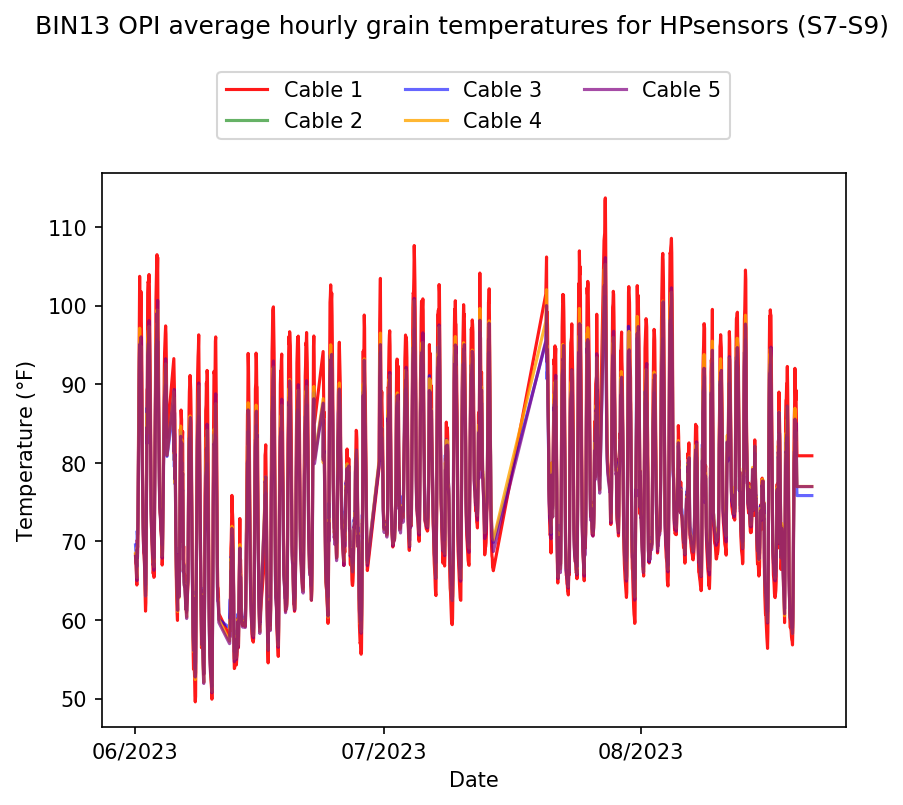

In [535]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
line3 = ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
line4 = ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
line5 = ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average hourly grain temperatures for HPsensors (S7-S9)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path+ '/B13_OPI_avg_hourly_graintemp_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [536]:
# # Moving average daytime
# temp = c1_hour_df.rolling(12).mean()
# c1_mov_avg = c1_hour_df[['OPI_DATE']].copy()
# c1_mov_avg = pd.concat([c1_mov_avg, temp], axis=1)
# c1_mov_avg = c1_mov_avg.dropna()
# c1_mov_avg

In [537]:
# # Moving average daytime c2
# temp = c2_hour_df.rolling(12).mean()
# c2_mov_avg = c2_hour_df[['OPI_DATE']].copy()
# c2_mov_avg = pd.concat([c2_mov_avg, temp], axis=1)
# c2_mov_avg = c2_mov_avg.dropna()
# c2_mov_avg

In [147]:
def get_daily_avg(original_df, time_column, value_column):
    output = []
    current_day = pd.Timestamp(original_df[time_column].values.min())
    current_day = datetime(year=current_day.year, month=current_day.month, day=current_day.day)
    end_date = pd.Timestamp(original_df[time_column].values.max())
    while current_day < end_date:
        
        day_df = original_df[(original_df[time_column] > current_day) & 
       (original_df[time_column] < current_day + timedelta(days=1))]
        output.append({
            time_column: current_day,
            value_column: day_df[value_column].mean()
        })
        current_day = current_day + timedelta(days=1)
    return pd.DataFrame(output, columns=[time_column, value_column])

In [148]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c1_daily_avg = get_daily_avg(c1, 'OPI_DATE', 'C1s-avg')
c1_daily_avg['C1-daily'] = c1_daily_avg['C1s-avg'].copy()
c1_daily_avg = c1_daily_avg.drop(['C1s-avg'], axis=1)
c1_daily_avg = c1_daily_avg.dropna()
c1_daily_avg

,OPI_DATE,C1-daily
0,2020-11-02,41.557500
1,2020-11-03,54.148889
2,2020-11-04,59.960000
3,2020-11-05,56.416667
4,2020-11-06,57.628333
...,...,...
1018,2023-08-17,73.392500
1019,2023-08-18,74.761667
1020,2023-08-19,77.534167
1021,2023-08-20,89.580000


In [149]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c2_daily_avg = get_daily_avg(c2, 'OPI_DATE', 'C2s-avg')
c2_daily_avg['C2-daily'] = c2_daily_avg['C2s-avg'].copy()
c2_daily_avg = c2_daily_avg.drop(['C2s-avg'], axis=1)
c2_daily_avg = c2_daily_avg.dropna()
c2_daily_avg

,OPI_DATE,C2-daily
0,2020-11-02,40.621667
1,2020-11-03,53.920952
2,2020-11-04,56.241667
3,2020-11-05,54.871667
4,2020-11-06,56.056744
...,...,...
1018,2023-08-17,73.248276
1019,2023-08-18,68.121224
1020,2023-08-19,72.017500
1021,2023-08-20,78.720000


In [150]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c3_daily_avg = get_daily_avg(c3, 'OPI_DATE', 'C3s-avg')
c3_daily_avg['C3-daily'] = c3_daily_avg['C3s-avg'].copy()
c3_daily_avg = c3_daily_avg.drop(['C3s-avg'], axis=1)
c3_daily_avg = c3_daily_avg.dropna()
c3_daily_avg

,OPI_DATE,C3-daily
0,2020-11-02,41.364167
1,2020-11-03,54.826667
2,2020-11-04,58.676667
3,2020-11-05,57.015000
4,2020-11-06,57.959535
...,...,...
1018,2023-08-17,72.005517
1019,2023-08-18,67.514286
1020,2023-08-19,71.880833
1021,2023-08-20,77.900000


In [151]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c4_daily_avg = get_daily_avg(c4, 'OPI_DATE', 'C4s-avg')
c4_daily_avg['C4-daily'] = c4_daily_avg['C4s-avg'].copy()
c4_daily_avg = c4_daily_avg.drop(['C4s-avg'], axis=1)
c4_daily_avg = c4_daily_avg.dropna()
c4_daily_avg

,OPI_DATE,C4-daily
0,2021-01-09,28.280000
1,2021-01-10,31.329167
2,2021-01-11,30.626333
3,2021-01-12,30.740000
12,2021-01-21,38.906000
...,...,...
778,2023-02-26,36.504444
798,2023-03-18,33.160000
799,2023-03-19,30.833333
806,2023-03-26,51.597143


In [152]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c5_daily_avg = get_daily_avg(c5, 'OPI_DATE', 'C5s-avg')
c5_daily_avg['C5-daily'] = c5_daily_avg['C5s-avg'].copy()
c5_daily_avg = c5_daily_avg.drop(['C5s-avg'], axis=1)
c5_daily_avg = c5_daily_avg.dropna()
c5_daily_avg

,OPI_DATE,C5-daily
0,2020-11-02,41.474167
1,2020-11-03,54.903810
2,2020-11-04,57.483333
3,2020-11-05,55.475000
4,2020-11-06,57.320000
...,...,...
1018,2023-08-17,75.164828
1019,2023-08-18,69.389796
1020,2023-08-19,73.628333
1021,2023-08-20,81.240000


In [112]:
# create dataframe to save
# create new df
#Daily average from first 5 sensors
to_be_save_df = c1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['C1_Daily_Average'] = c1_daily_avg[['C1-daily']].copy()
to_be_save_df['C2_Daily_Average'] = c2_daily_avg[['C2-daily']].copy()
to_be_save_df['C3_Daily_Average'] = c3_daily_avg[['C3-daily']].copy()
to_be_save_df['C4_Daily_Average'] = c4_daily_avg[['C4-daily']].copy()
to_be_save_df['C5_Daily_Average'] = c5_daily_avg[['C5-daily']].copy()
to_be_save_df
# saving the daily average from first 5 sensors 
to_be_save_df.to_csv(path+'\\B16_OPI_daily_graintemps_HPsensors.csv') #a=path+'\\PHERC_data_b5.xlsx'

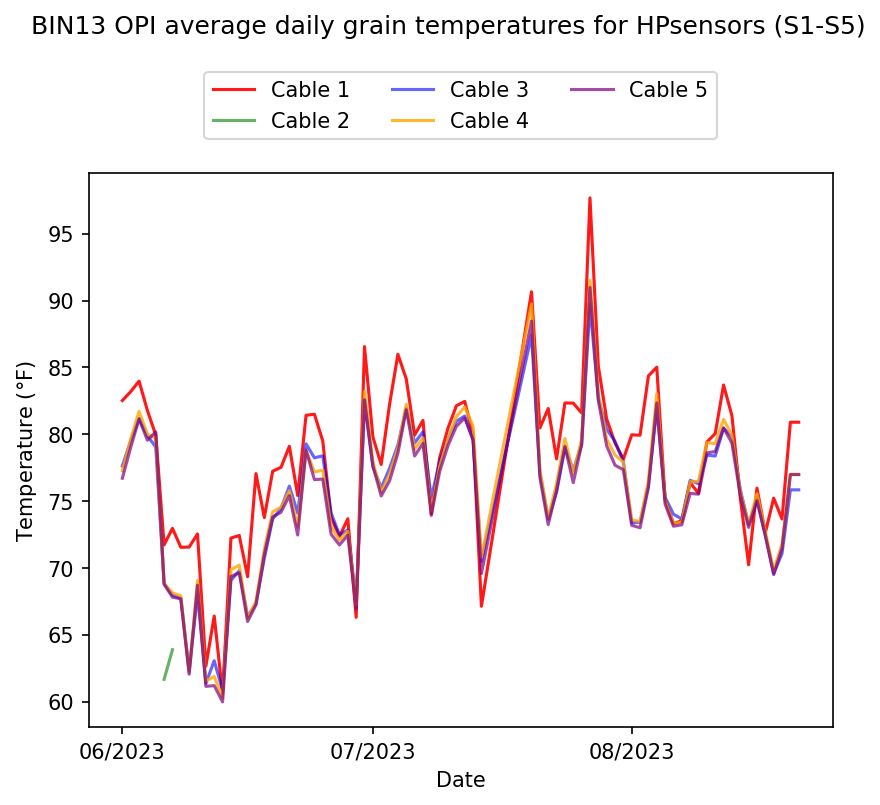

In [545]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1_daily_avg['OPI_DATE'].values, c1_daily_avg['C1-daily'].values, 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2_daily_avg['OPI_DATE'].values, c2_daily_avg['C2-daily'].values, 'green', label='Cable 2', alpha=0.6)
line3 =ax.plot(c3_daily_avg['OPI_DATE'].values, c3_daily_avg['C3-daily'].values,'blue', label='Cable 3', alpha=0.6)
line4 =ax.plot(c4_daily_avg['OPI_DATE'].values, c4_daily_avg['C4-daily'].values,'orange', label='Cable 4', alpha=0.8)
line5 =ax.plot(c5_daily_avg['OPI_DATE'].values, c5_daily_avg['C5-daily'].values,'purple', label='Cable 5', alpha=0.7)

#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average daily grain temperatures for HPsensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path+ '\B13_OPI_avg_daily_graintemp_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [113]:
#THIS IS FOR AVG GRAIN RH
# average of first 3 sensors
RH1 = clean_df[['OPI_DATE', 'RH1s-avg']].copy()
RH1 = RH1.dropna()
RH1

,OPI_DATE,RH1s-avg
102,2020-11-02 00:51:00,79.10
103,2020-11-02 01:51:00,81.50
104,2020-11-02 02:51:00,82.38
105,2020-11-02 03:51:00,81.72
106,2020-11-02 04:51:00,81.10
...,...,...
11835,2022-06-25 22:41:00,65.70
11836,2022-06-25 23:41:00,63.56
11837,2022-06-26 00:41:00,60.84
11838,2022-06-26 01:41:00,63.64


In [114]:
current_time = RH1.loc[RH1.index[0]]['OPI_DATE']
for index, row in RH1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == RH1.index[0]:
        current_time = timestamp
    else:
        RH1 = RH1.drop(index)

In [115]:
temp = RH1.copy()
temp
temp.index[0]
RH1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2020-11-02 00:51:00')

In [549]:
# average of first 3 sensors
#RH2 = clean_df[['OPI_DATE', 'RH2s-avg']].copy()
#RH2 = RH2.dropna()
#RH2

In [116]:
# create dataframe to save
# create new df
to_be_save_df = RH1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['RH1_Avg_5_sensors'] = RH1[['RH1s-avg']].copy()
#to_be_save_df['RH2_Avg_3_sensors'] = RH2[['RH2s-avg']].copy()
#to_be_save_df['RH3_Avg_3_sensors'] = RH3[['RH3s-avg']].copy()
#to_be_save_df['RH4_Avg_3_sensors'] = RH4[['RH4s-avg']].copy()
#to_be_save_df['RH5_Avg_3_sensors'] = RH5[['RH5s-avg']].copy()
to_be_save_df
# saving the 5 avg sensors (hourly)
to_be_save_df.to_csv(path+'\\B8_Avg_hr_grain_RH_HPsensors.csv') 
to_be_save_df

,OPI_DATE,RH1_Avg_5_sensors
102,11/02/2020 12:51 AM,79.10
103,11/02/2020 01:51 AM,81.50
104,11/02/2020 02:51 AM,82.38
105,11/02/2020 03:51 AM,81.72
106,11/02/2020 04:51 AM,81.10
...,...,...
11835,06/25/2022 10:41 PM,65.70
11836,06/25/2022 11:41 PM,63.56
11837,06/26/2022 12:41 AM,60.84
11838,06/26/2022 01:41 AM,63.64


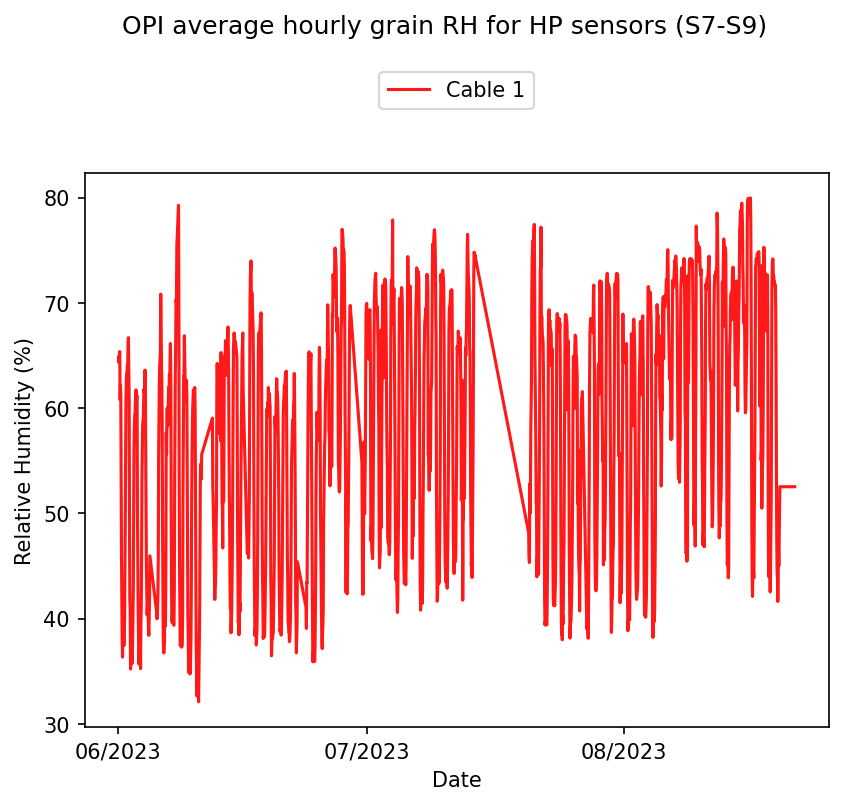

In [551]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1['OPI_DATE'].values, RH1['RH1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2['OPI_DATE'].values, RH2['RH2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(RH3['OPI_DATE'].values, RH3['RH3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(RH4['OPI_DATE'].values, RH4['RH4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(RH5['OPI_DATE'].values, RH5['RH5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI average hourly grain RH for HP sensors (S7-S9)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
#filename = path / 'B13_OPI_avg_hourly_grain_RH_HPsensors.jpeg'
filename = path+ '\B13_OPI_avg_hourly_grain_RH_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [79]:
#This is for avg daily RH 
#note that it is only one cable that works i.e RH1 hence other cables are 'commented'
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH1_daily_avg = get_daily_avg(RH1, 'OPI_DATE', 'RH1s-avg')
RH1_daily_avg['RH1-daily'] = RH1_daily_avg['RH1s-avg'].copy()
RH1_daily_avg = RH1_daily_avg.drop(['RH1s-avg'], axis=1)
RH1_daily_avg = RH1_daily_avg.dropna()
RH1_daily_avg

,OPI_DATE,RH1-daily
0,2020-11-02,51.522500
1,2020-11-03,51.452222
2,2020-11-04,73.418333
3,2020-11-05,76.543478
4,2020-11-06,75.206667
...,...,...
1018,2023-08-17,67.070833
1019,2023-08-18,60.120833
1020,2023-08-19,57.654167
1021,2023-08-20,52.520000


In [553]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
#RH2
# RH2_daily_avg = get_daily_avg(RH2, 'OPI_DATE', 'RH2s-avg')
# RH2_daily_avg['RH2-daily'] = RH2_daily_avg['RH2s-avg'].copy()
# RH2_daily_avg = RH2_daily_avg.drop(['RH2s-avg'], axis=1)
# RH2_daily_avg = RH2_daily_avg.dropna()
# RH2_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [554]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
#RH3
# RH3_daily_avg = get_daily_avg(RH3, 'OPI_DATE', 'RH3s-avg')
# RH3_daily_avg['RH3-daily'] = RH3_daily_avg['RH3s-avg'].copy()
# RH3_daily_avg = RH3_daily_avg.drop(['RH3s-avg'], axis=1)
# RH3_daily_avg = RH3_daily_avg.dropna()
# RH3_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [80]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = RH1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['RH1_Daily_Average'] = RH1_daily_avg[['RH1-daily']].copy()
# to_be_save_df['RH2_Daily_Average'] = RH2_daily_avg[['RH2-daily']].copy()
# to_be_save_df['RH3_Daily_Average'] = RH3_daily_avg[['RH3-daily']].copy()
# to_be_save_df['RH4_Daily_Average'] = RH4_daily_avg[['RH4-daily']].copy()
# to_be_save_df['RH5_Daily_Average'] = RH5_daily_avg[['RH5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path+'\\B5_OPI_daily_grain_RH_HP.csv')

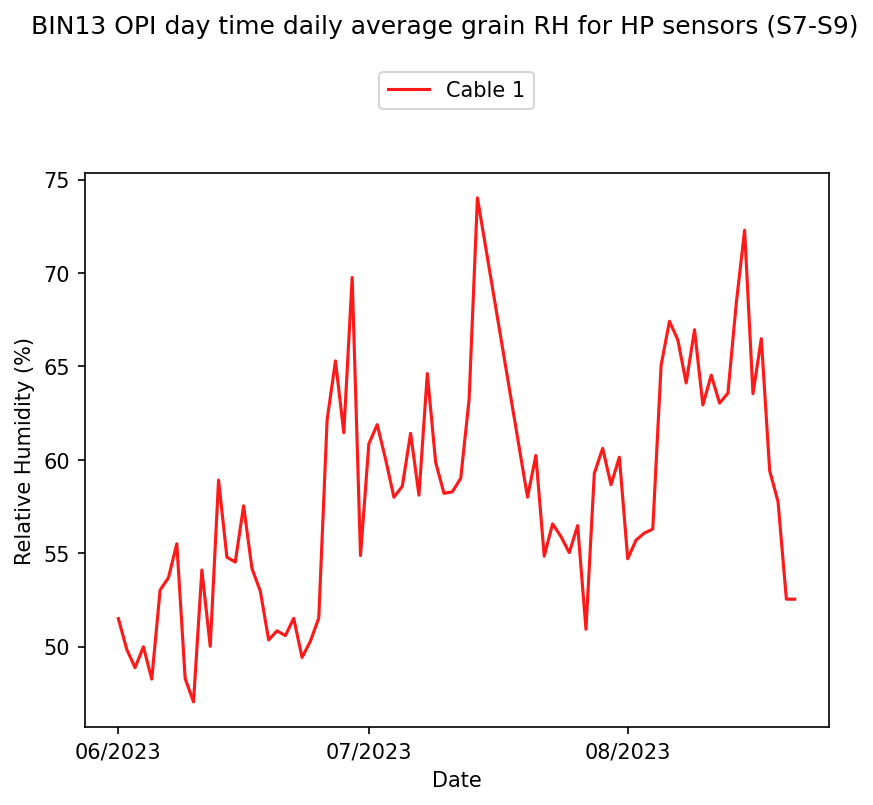

In [556]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1_daily_avg['OPI_DATE'].values, RH1_daily_avg['RH1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2_daily_avg['OPI_DATE'].values, RH2_daily_avg['RH2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(RH3_daily_avg['OPI_DATE'].values, RH3_daily_avg['RH3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(RH4_daily_avg['OPI_DATE'].values, RH4_daily_avg['RH4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(RH5_daily_avg['OPI_DATE'].values, RH5_daily_avg['RH5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI day time daily average grain RH for HP sensors (S7-S9)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path+ '\B13_OPI_daily_avg_grain_RH_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [557]:
#THIS IS FOR AVG GRAIN MC
# average of first 3 sensors
#NOTE only cable 1 is working (MC1) hence we 'comment' on the others
MC1 = clean_df[['OPI_DATE', 'MC1s-avg']].copy()
MC1 = MC1.dropna()
MC1

,OPI_DATE,MC1s-avg
18676,2023-06-01 00:50:00,13.576
18677,2023-06-01 01:50:00,13.650
18678,2023-06-01 02:50:00,13.586
18679,2023-06-01 03:50:00,13.720
18680,2023-06-01 04:50:00,13.762
...,...,...
20797,2023-08-21 11:02:00,11.964
20798,2023-08-21 12:02:00,11.964
20799,2023-08-21 13:02:00,11.964
20800,2023-08-21 14:02:00,11.964


In [558]:
# average of first 3 sensors
# MC2 = clean_df[['OPI_DATE', 'MC2s-avg']].copy()
# MC2 = MC2.dropna()
# MC2

In [559]:
current_time = MC1.loc[MC1.index[0]]['OPI_DATE']
for index, row in MC1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == MC1.index[0]:
        current_time = timestamp
    else:
        MC1 = MC1.drop(index)


In [560]:
MC1

,OPI_DATE,MC1s-avg
18676,2023-06-01 00:50:00,13.576
18677,2023-06-01 01:50:00,13.650
18678,2023-06-01 02:50:00,13.586
18679,2023-06-01 03:50:00,13.720
18680,2023-06-01 04:50:00,13.762
...,...,...
20797,2023-08-21 11:02:00,11.964
20798,2023-08-21 12:02:00,11.964
20799,2023-08-21 13:02:00,11.964
20800,2023-08-21 14:02:00,11.964


In [561]:
temp = MC1.copy()
temp
temp.index[0]
MC1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2023-06-01 00:50:00')

In [562]:
# create dataframe to save
# create new df
to_be_save_df = MC1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['MC1_Avg_5_sensors'] = MC1[['MC1s-avg']].copy()
# to_be_save_df['MC2_Avg_3_sensors'] = RH2[['MC2s-avg']].copy()
# to_be_save_df['MC3_Avg_3_sensors'] = RH3[['MC3s-avg']].copy()
# to_be_save_df['MC4_Avg_3_sensors'] = RH4[['MC4s-avg']].copy()
# to_be_save_df['MC5_Avg_3_sensors'] = RH5[['MC5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path+'/B13_Avg_hourly_grainMC_HPsensors.csv')
to_be_save_df

,OPI_DATE,MC1_Avg_5_sensors
18676,06/01/2023 12:50 AM,13.576
18677,06/01/2023 01:50 AM,13.650
18678,06/01/2023 02:50 AM,13.586
18679,06/01/2023 03:50 AM,13.720
18680,06/01/2023 04:50 AM,13.762
...,...,...
20797,08/21/2023 11:02 AM,11.964
20798,08/21/2023 12:02 PM,11.964
20799,08/21/2023 01:02 PM,11.964
20800,08/21/2023 02:02 PM,11.964


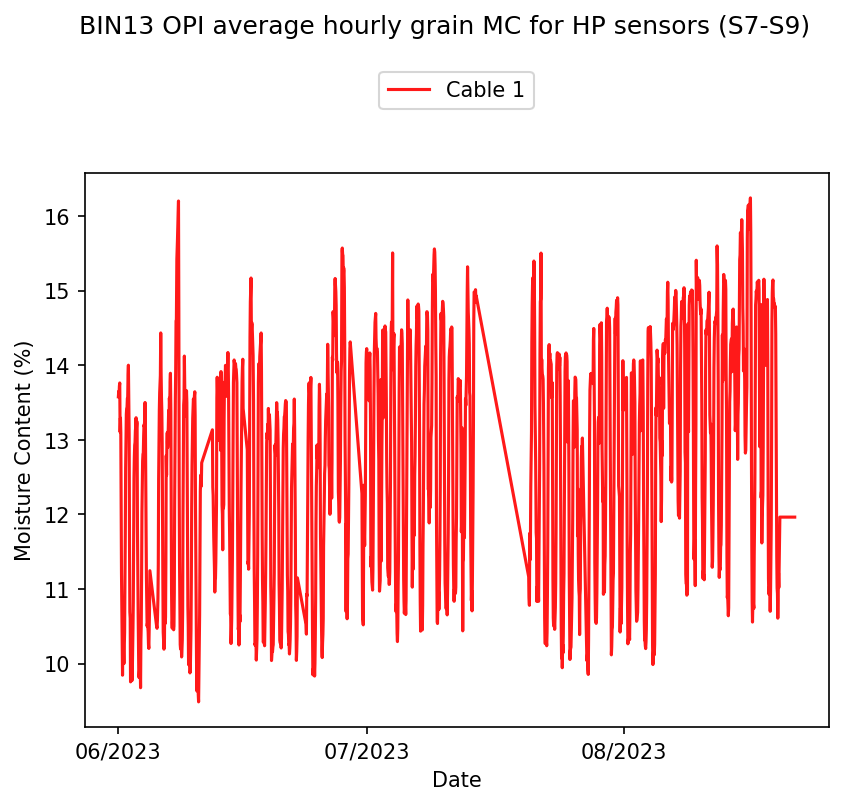

In [563]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1['OPI_DATE'].values, MC1['MC1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2['OPI_DATE'].values, MC2['MC2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(MC3['OPI_DATE'].values, MC3['MC3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(MC4['OPI_DATE'].values, MC4['MC4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(MC5['OPI_DATE'].values, MC5['MC5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average hourly grain MC for HP sensors (S7-S9)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path+ '\B13_OPI_avg_hourly_grainMC_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [564]:
#for daytime avg grain MC
#note only cable 1 works (MC1) hence we "comment" on others
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
MC1_daily_avg = get_daily_avg(MC1, 'OPI_DATE', 'MC1s-avg')
MC1_daily_avg['MC1-daily'] = MC1_daily_avg['MC1s-avg'].copy()
MC1_daily_avg = MC1_daily_avg.drop(['MC1s-avg'], axis=1)
MC1_daily_avg = MC1_daily_avg.dropna()
MC1_daily_avg

,OPI_DATE,MC1-daily
0,2023-06-01,11.877500
1,2023-06-02,11.693478
2,2023-06-03,11.555750
3,2023-06-04,11.718190
4,2023-06-05,11.568750
...,...,...
77,2023-08-17,13.851417
78,2023-08-18,12.953130
79,2023-08-19,12.795000
80,2023-08-20,11.964000


In [565]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC2_daily_avg = get_daily_avg(MC2, 'OPI_DATE', 'MC2s-avg')
# MC2_daily_avg['MC2-daily'] = MC2_daily_avg['MC2s-avg'].copy()
# MC2_daily_avg = MC2_daily_avg.drop(['MC2s-avg'], axis=1)
# MC2_daily_avg = MC2_daily_avg.dropna()
# MC2_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [566]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = MC1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['MC1_Daily_Average'] = MC1_daily_avg[['MC1-daily']].copy()
# to_be_save_df['MC2_Daily_Average'] = MC2_daily_avg[['MC2-daily']].copy()
# to_be_save_df['MC3_Daily_Average'] = MC3_daily_avg[['MC3-daily']].copy()
# to_be_save_df['MC4_Daily_Average'] = MC4_daily_avg[['MC4-daily']].copy()
# to_be_save_df['MC5_Daily_Average'] = MC5_daily_avg[['MC5-daily']].copy()
to_be_save_df
# saving the daily average from first 5 sensors 
to_be_save_df.to_csv(path+'/B13_OPI_daily_avg_grainMC_HP.csv')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

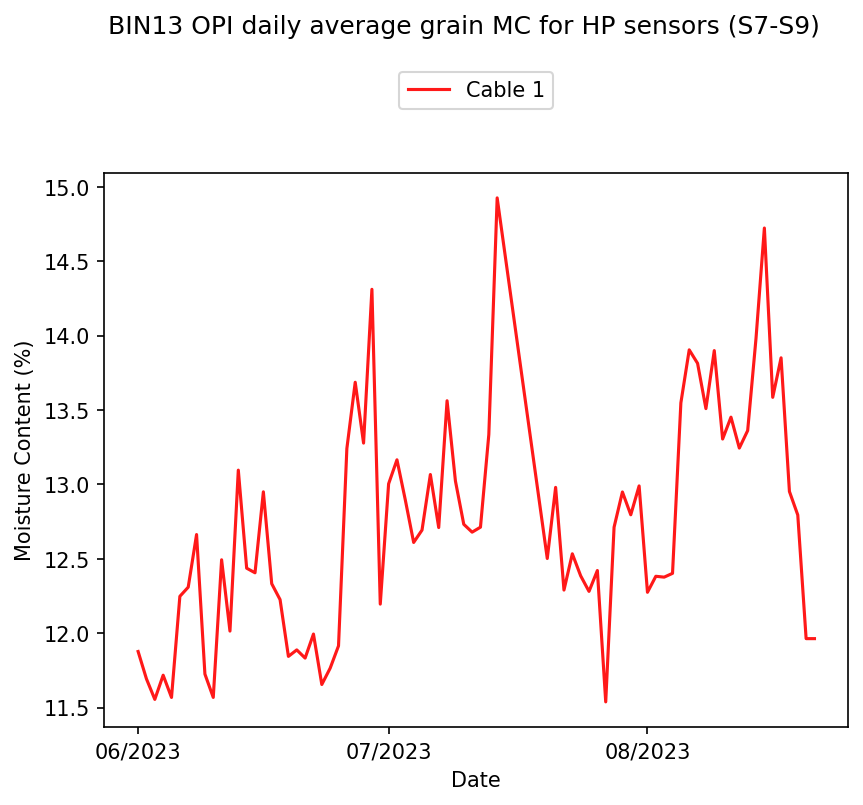

In [567]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1_daily_avg['OPI_DATE'].values, MC1_daily_avg['MC1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2_daily_avg['OPI_DATE'].values, MC2_daily_avg['MC2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(MC3_daily_avg['OPI_DATE'].values, MC3_daily_avg['MC3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(MC4_daily_avg['OPI_DATE'].values, MC4_daily_avg['MC4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(MC5_daily_avg['OPI_DATE'].values, MC5_daily_avg['MC5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")

date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI daily average grain MC for HP sensors (S7-S9)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'B13_OPI_daily_avg_grainMC_HPsensors.jpeg'
plt.savefig(filename, bbox_inches='tight')